<a href="https://colab.research.google.com/github/ndkshr/TextToFacialComposite/blob/master/FCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!rm -rf T2F
!git clone https://github.com/ndkshr/T2F.git

Cloning into 'T2F'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 353 (delta 28), reused 36 (delta 11), pack-reused 291
Receiving objects: 100% (353/353), 509.58 MiB | 36.66 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!mkdir /content/T2F/implementation/networks/InferSent/models

In [0]:
!cp /content/gdrive/My\ Drive/T2F/infersent2.pkl /content/T2F/implementation/networks/InferSent/models/infersent2.pkl
#!curl -Lo /content/T2F/implementation/networks/InferSent/models/infersent2.pkl https://dl.fbaipublicfiles.com/infersent/infersent2.pkl

In [0]:
!ls -lah /content/T2F/implementation/networks/InferSent/models/infersent2.pkl

-r-------- 1 root root 147M Jun 14 07:02 /content/T2F/implementation/networks/InferSent/models/infersent2.pkl


In [0]:
#!wget http://nlp.stanford.edu/data/glove.840B.300d.zip
#!unzip glove.840B.300d.zip
#!mv glove.840B.300d.txt /content/T2F/implementation/networks/InferSent/models/glove.840B.300d.txt

In [0]:
#!mv glove.840B.300d.txt /content/T2F/implementation/networks/InferSent/models/glove.840B.300d.txt

In [0]:
#!cp /content/T2F/implementation/networks/InferSent/models/glove.840B.300d.txt /content/gdrive/My\ Drive/T2F/glove.840B.300d.txt

In [0]:
!cp /content/gdrive/My\ Drive/T2F/glove.840B.300d.txt /content/T2F/implementation/networks/InferSent/models/glove.840B.300d.txt 

In [0]:
!wget http://vis-www.cs.umass.edu/lfw/lfw.tgz
!tar -xf lfw.tgz

--2019-06-14 07:05:02--  http://vis-www.cs.umass.edu/lfw/lfw.tgz
Resolving vis-www.cs.umass.edu (vis-www.cs.umass.edu)... 128.119.244.95
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180566744 (172M) [application/x-gzip]
Saving to: ‘lfw.tgz’

lfw.tgz             100%[===================>] 172.20M  32.8MB/s    in 7.0s    

2019-06-14 07:05:09 (24.6 MB/s) - ‘lfw.tgz’ saved [180566744/180566744]



In [0]:
!pip install -r T2F/requirements.txt

     |████████████████████████████████| 48.0MB 611kB/s 
     |████████████████████████████████| 17.0MB 24.3MB/s 
     |████████████████████████████████| 2.0MB 41.0MB/s 
     |████████████████████████████████| 484.0MB 30kB/s 
     |████████████████████████████████| 61kB 25.6MB/s 
     |████████████████████████████████| 256kB 48.8MB/s 
     |████████████████████████████████| 3.1MB 40.7MB/s 
     |████████████████████████████████| 890kB 46.3MB/s 
  Stored in directory: /root/.cache/pip/wheels/58/40/dd/87bc05b3d56641ccb8f099babf6ff5faed5db5c03c5d837450
  Stored in directory: /root/.cache/pip/wheels/03/05/65/bdc14f2c6e09e82ae3e0f13d021e1b6b2481437ea2f207df3f
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built easydict PyYAML html5lib
ERROR: tensorflow 1.7.0 has requirement numpy>=1.13.3, but you'll have numpy 1.13.1 which is incompatible.
ERROR: tensorflow-probability 0.7.0rc0 has requirement numpy>=1.13.3, but you'll

In [0]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [0]:
!pip uninstall -y torch
!pip install https://download.pytorch.org/whl/cu100/torch-1.0.0-cp36-cp36m-linux_x86_64.whl
#!pip install torch==0.4.0

Uninstalling torch-0.4.0:
  Successfully uninstalled torch-0.4.0
     |████████████████████████████████| 753.6MB 17kB/s 
ERROR: fastai 1.0.52 has requirement numpy>=1.15, but you'll have numpy 1.13.1 which is incompatible.


In [0]:
import sys
sys.path.append('/content/T2F/implementation')
sys.path.append('/content/T2F/')

In [0]:
from train_network import main as main_train
from train_network import get_config

In [0]:
import argparse

parser = argparse.ArgumentParser()
parser.add_argument("--config", action="store", type=str, default="/content/T2F/implementation/configs/2_colab.conf",
                    help="default configuration for the Network")
parser.add_argument("--start_depth", action="store", type=int, default=0,
                    help="Starting depth for training the network")
parser.add_argument("--encoder_file", action="store", type=str, default=None,
                    help="pretrained Encoder file (compatible with my code)")
parser.add_argument("--ca_file", action="store", type=str, default=None,
                    help="pretrained Conditioning Augmentor file (compatible with my code)")
parser.add_argument("--generator_file", action="store", type=str, default=None,
                    help="pretrained Generator file (compatible with my code)")
parser.add_argument("--discriminator_file", action="store", type=str, default=None,
                    help="pretrained Discriminator file (compatible with my code)")

_StoreAction(option_strings=['--discriminator_file'], dest='discriminator_file', nargs=None, const=None, default=None, type=<class 'str'>, choices=None, help='pretrained Discriminator file (compatible with my code)', metavar=None)

In [0]:
args = parser.parse_args([])

In [0]:
config = get_config(args.config)

In [0]:
import torch as th

class ConditionAugmentor(th.nn.Module):
    """ Perform conditioning augmentation
        from the paper -> https://arxiv.org/abs/1710.10916 (StackGAN++)
        uses the reparameterization trick from VAE paper.
    """

    def __init__(self, input_size, latent_size, use_eql=True, device=th.device("cpu")):
        """
        constructor of the class
        :param input_size: input size to the augmentor
        :param latent_size: required output size
        :param use_eql: boolean for whether to use equalized learning rate
        :param device: device on which to run the Module
        """
        super(ConditionAugmentor, self).__init__()

        assert latent_size % 2 == 0, "Latent manifold has odd number of dimensions"

        # state of the object
        self.device = device
        self.input_size = input_size
        self.latent_size = latent_size

        # required modules:
        if use_eql:
            from pro_gan_pytorch.CustomLayers import _equalized_linear
            self.transformer = _equalized_linear(self.input_size, 2 * self.latent_size).to(device)
        else:
            self.transformer = th.nn.Linear(self.input_size, 2 * self.latent_size).to(device)

    def forward(self, x, epsilon=1e-12):
        """
        forward pass (computations)
        :param x: input
        :param epsilon: a small noise added for numerical stability
        :return: c_not_hat, mus, sigmas => augmented text embeddings, means, stds
        """
        from torch.nn.functional import relu

        # apply the feed forward layer:
        combined = self.transformer(x)

        # use the reparameterization trick
        mid_point = self.latent_size
        mus, sigmas = combined[:, :mid_point], combined[:, mid_point:]

        # mus don't need to be transformed, but sigmas cannot be negative.
        # so, we'll apply a ReLU on top of sigmas
        sigmas = relu(sigmas)  # hopefully the network will learn a good sigma mapping
        sigmas = sigmas + epsilon  # small noise added for stability

        epsilon = th.randn(*mus.shape).to(self.device)
        c_not_hat = (epsilon * sigmas) + mus

        return c_not_hat, mus, sigmas


In [0]:
device = 'cuda'

import data_processing.DataLoader as dl

dataset = dl.RawTextFace2TextDataset(
    annots_file=config.annotations_file,
    img_dir=config.images_dir,
    img_transform=dl.get_transform(config.img_dims)
)
from networks.TextEncoder import PretrainedEncoder
# create a new session object for the pretrained encoder:
text_encoder = PretrainedEncoder(
    model_file=config.pretrained_encoder_file,
    embedding_file=config.pretrained_embedding_file,
    device=device
)

Vocab size : 300000


In [0]:
text_encoder = PretrainedEncoder(
    model_file=config.pretrained_encoder_file,
    embedding_file=config.pretrained_embedding_file,
    device=device
)

Vocab size : 300000


In [0]:
condition_augmenter = ConditionAugmentor(
    input_size=config.hidden_size,
    latent_size=config.ca_out_size,
    use_eql=config.use_eql,
    device='cuda'
)

In [0]:
temp_data = dl.get_data_loader(dataset, 64, num_workers=3)
fixed_captions, fixed_real_images = iter(temp_data).next()
fixed_embeddings = text_encoder(fixed_captions)
fixed_embeddings.shape

(64, 4096)

In [0]:
condition_augmenter.train()

# create fixed_input for debugging
temp_data = dl.get_data_loader(dataset, 64, num_workers=3)
fixed_captions, fixed_real_images = iter(temp_data).next()
fixed_embeddings = text_encoder(fixed_captions)
fixed_embeddings = th.from_numpy(fixed_embeddings).to(device)

fixed_c_not_hats, _, _ = condition_augmenter(fixed_embeddings)

fixed_noise = th.randn(len(fixed_captions),
                       config.latent_size - fixed_c_not_hats.shape[-1]).to(device)

fixed_gan_input = th.cat((fixed_c_not_hats, fixed_noise), dim=-1)

In [0]:
fixed_embeddings.shape

torch.Size([64, 4096])

In [0]:
import torch
torch.load('/content/T2F/implementation/networks/InferSent/models/infersent2.pkl')

OrderedDict([('enc_lstm.weight_ih_l0',
              tensor([[-0.0220, -0.0015,  0.0162,  ..., -0.0165,  0.0198, -0.0187],
                      [ 0.0130,  0.0114,  0.0155,  ..., -0.0107,  0.0087,  0.0057],
                      [ 0.0154, -0.0010, -0.0112,  ..., -0.0016,  0.0198,  0.0168],
                      ...,
                      [ 0.0137, -0.0175,  0.0026,  ...,  0.0131, -0.0162, -0.0105],
                      [ 0.0020,  0.0286,  0.0097,  ...,  0.0062,  0.0467, -0.0168],
                      [-0.0089, -0.0081,  0.0118,  ...,  0.0097,  0.0081,  0.0198]])),
             ('enc_lstm.weight_hh_l0',
              tensor([[-4.9984e-03,  1.3833e-02, -5.5068e-03,  ..., -1.4855e-02,
                       -2.1088e-02, -1.4722e-03],
                      [-1.3573e-03,  1.8085e-02,  3.0116e-04,  ..., -8.6804e-03,
                        1.2311e-02,  2.0616e-02],
                      [-1.0569e-03,  3.0117e-03,  1.8724e-02,  ..., -7.3298e-03,
                       -1.6576e-02,  1.1518e-

In [0]:
from networks.TextEncoder import PretrainedEncoder
# create a new session object for the pretrained encoder:
text_encoder = PretrainedEncoder(
    model_file='/content/T2F/implementation/networks/InferSent/models/infersent2.pkl',
    embedding_file='/content/T2F/implementation/networks/InferSent/models/glove.840B.300d.txt',
    device='cuda'
)

Vocab size : 300000


In [0]:
#main_train(args)

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

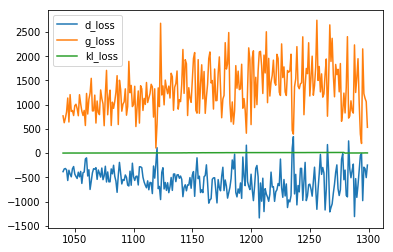

In [0]:
for i in range(4, 5):
  log = pd.read_csv('/content/gdrive/My Drive/T2F/training_runs/2/losses/loss_{}.log'.format(i), delimiter='\t', header=None, names=['d_loss', 'g_loss', 'kl_loss'])
  n = len(log.d_loss)
  xs = list(range(n*i, n*(i + 1)))
  plt.plot(xs, log.d_loss)
  plt.plot(xs, log.g_loss)
  plt.plot(xs, log.kl_loss)
  plt.legend(log.columns)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

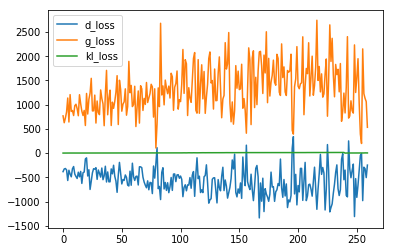

In [0]:
plt.plot(log.d_loss)
plt.plot(log.g_loss)
plt.plot(log.kl_loss)
plt.legend(log.columns)

In [0]:
from networks.ConditionAugmentation import ConditionAugmentor
from pro_gan_pytorch.PRO_GAN import ConditionalProGAN

import numpy as np

def create_grid(samples, scale_factor, img_file, real_imgs=False):
    """
    utility function to create a grid of GAN samples
    :param samples: generated samples for storing
    :param scale_factor: factor for upscaling the image
    :param img_file: name of file to write
    :param real_imgs: turn off the scaling of images
    :return: None (saves a file)
    """
    from torchvision.utils import save_image
    from torch.nn.functional import interpolate

    samples = th.clamp((samples / 2) + 0.5, min=0, max=1)

    # upsample the image
    if not real_imgs and scale_factor > 1:
        samples = interpolate(samples,
                              scale_factor=scale_factor)

    # save the images:
    save_image(samples, img_file, nrow=int(np.sqrt(len(samples))))

In [0]:
!cd "/content/gdrive/My Drive/T2F/training_runs/2/saved_models1"

In [0]:
# create the networks

condition_augmenter = ConditionAugmentor(
    input_size=config.hidden_size,
    latent_size=config.ca_out_size,
    use_eql=config.use_eql,
    device=device
)

ca_file = '/content/gdrive/My Drive/T2F/training_runs/2/saved_models1/Condition_Augmentor_4.pth'

print("Loading conditioning augmenter from:", ca_file)
condition_augmenter.load_state_dict(th.load(ca_file))

c_pro_gan = ConditionalProGAN(
    embedding_size=config.hidden_size,
    depth=config.depth,
    latent_size=config.latent_size,
    compressed_latent_size=config.compressed_latent_size,
    learning_rate=config.learning_rate,
    beta_1=config.beta_1,
    beta_2=config.beta_2,
    eps=config.eps,
    drift=config.drift,
    n_critic=config.n_critic,
    use_eql=config.use_eql,
    loss=config.loss_function,
    use_ema=config.use_ema,
    ema_decay=config.ema_decay,
    device=device
)

generator_file = '/content/gdrive/My Drive/T2F/training_runs/2/saved_models1/GAN_GEN_4.pth'
print("Loading generator from:", generator_file)
c_pro_gan.gen.load_state_dict(th.load(generator_file))

In [0]:
condition_augmenter.train(False)

In [0]:
temp_data = dl.get_data_loader(dataset, 1, num_workers=3)
fixed_captions, fixed_real_images = iter(temp_data).next()

In [0]:
str = input('Enter your caption : ')


In [0]:
fixed_caption = (str,)
fixed_captions = fixed_caption

In [0]:
for counter16 in range(30):
  fixed_embeddings = text_encoder(fixed_captions)
  fixed_embeddings = th.from_numpy(fixed_embeddings).to(device)

  fixed_c_not_hats, mus, _ = condition_augmenter(fixed_embeddings)

  fixed_noise = th.zeros(len(fixed_captions),
                         c_pro_gan.latent_size - fixed_c_not_hats.shape[-1]).to(device)

  fixed_gan_input = th.cat((fixed_c_not_hats, fixed_noise), dim=-1)
  create_grid(
      samples=c_pro_gan.gen(
          fixed_gan_input,
          4,
          1.0
      ),
      scale_factor=1,
      img_file='output.png')

  img = plt.imread('output.png')
  plt.figure()
  plt.imshow(img)

In [0]:
fixed_captions

In [0]:
fixed_embeddings.shape